In [564]:
import pandas as pd
from csv import reader
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


1(a)

In [565]:
path = '../data/diagnosis.data'
data = []
attrs = ['a1','a2','a3','a4','a5','a6','d1','d2']
with open(path,encoding='utf-16', errors='ignore') as j:
    for line in j:
        b = line.split('\n')
        for line in b:
            a = line.split('\t')
            if len(a)>1:
                data.append(a)
data = pd.DataFrame(data)
data.columns = attrs
data['a1']=data['a1'].str.replace(',','.')
print(data)


       a1   a2   a3   a4   a5   a6   d1   d2
0    35.5   no  yes   no   no   no   no   no
1    35.9   no   no  yes  yes  yes  yes   no
2    35.9   no  yes   no   no   no   no   no
3    36.0   no   no  yes  yes  yes  yes   no
4    36.0   no  yes   no   no   no   no   no
..    ...  ...  ...  ...  ...  ...  ...  ...
115  41.4   no  yes  yes   no  yes   no  yes
116  41.5   no   no   no   no   no   no   no
117  41.5  yes  yes   no  yes   no   no  yes
118  41.5   no  yes  yes   no  yes   no  yes
119  41.5   no  yes  yes   no  yes   no  yes

[120 rows x 8 columns]


In [566]:
data.iloc[:,1:]=OrdinalEncoder().fit_transform(data.iloc[:,1:])

In [567]:
X_data  = data.iloc[:,0:6]
Y_data = data.iloc[:,-2:]

1(b)

[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

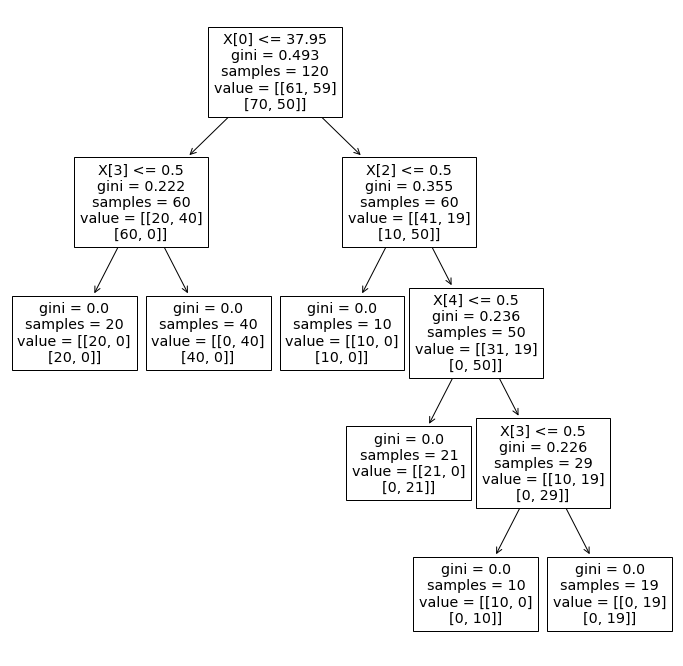

In [568]:
tree_1=tree.DecisionTreeClassifier(max_depth=10)
tree_1 = tree_1.fit(X_data,Y_data)
plt.figure(figsize=(12,12))
tree.plot_tree(tree_1)



1(c)

In [569]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as a Python function

    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as a function
    feature_names: list
    The feature names of the dataset used for building the decision tree
    """

    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [570]:
feature = ['a1','a2','a3','a4','a5','a6']
a = tree_to_code(tree_1,feature)

def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if a3 > 0.5
      if a5 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if a5 > 0.5
        if a4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if a4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


1(d) 

In [571]:
path = tree_1.cost_complexity_pruning_path(X_data, Y_data)
ccp_alphas = path.ccp_alphas

In [572]:
clf1 = DecisionTreeClassifier()
grid_value = {'ccp_alpha':ccp_alphas}
res = GridSearchCV(clf1,param_grid=grid_value,scoring = 'accuracy',cv = 10)

In [573]:
res.fit(X_data,Y_data)
best_alpha = res.best_params_['ccp_alpha']


def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if a3 > 0.5
      if a2 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if a2 > 0.5
        if a4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if a4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


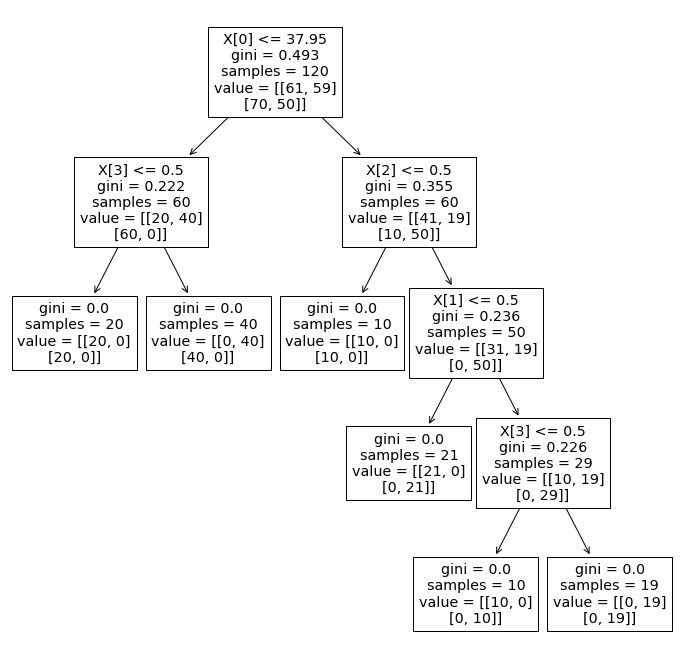

In [574]:
clf_best = DecisionTreeClassifier(ccp_alpha = best_alpha)
clf_best.fit(X_data,Y_data)
plt.figure(figsize=(12,12))
tree.plot_tree(clf_best)
a = tree_to_code(clf_best,feature)

2(a)(b)

In [575]:
def readFile(filename):
    data = pd.read_csv(filename, header = None)
    return data
dataset = readFile('../data/communities.csv')

In [576]:
attributes = []
with open('../data/communities.names', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if (line.startswith('@attribute')):
            attributes.append(line.split(" ")[1])

In [577]:
data = pd.DataFrame(dataset)
data_predict = data.iloc[:, 5:]
data_full = data_predict.replace('?', np.nan)
simp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_t = simp_mean.fit_transform(data_full)
data_t = pd.DataFrame(data_t)
del attributes[0:5]
data_t.columns = attributes

In [578]:
train_set = data_t.iloc[0:1495,:]
test_set = data_t.iloc[1495:,:]

2(c)

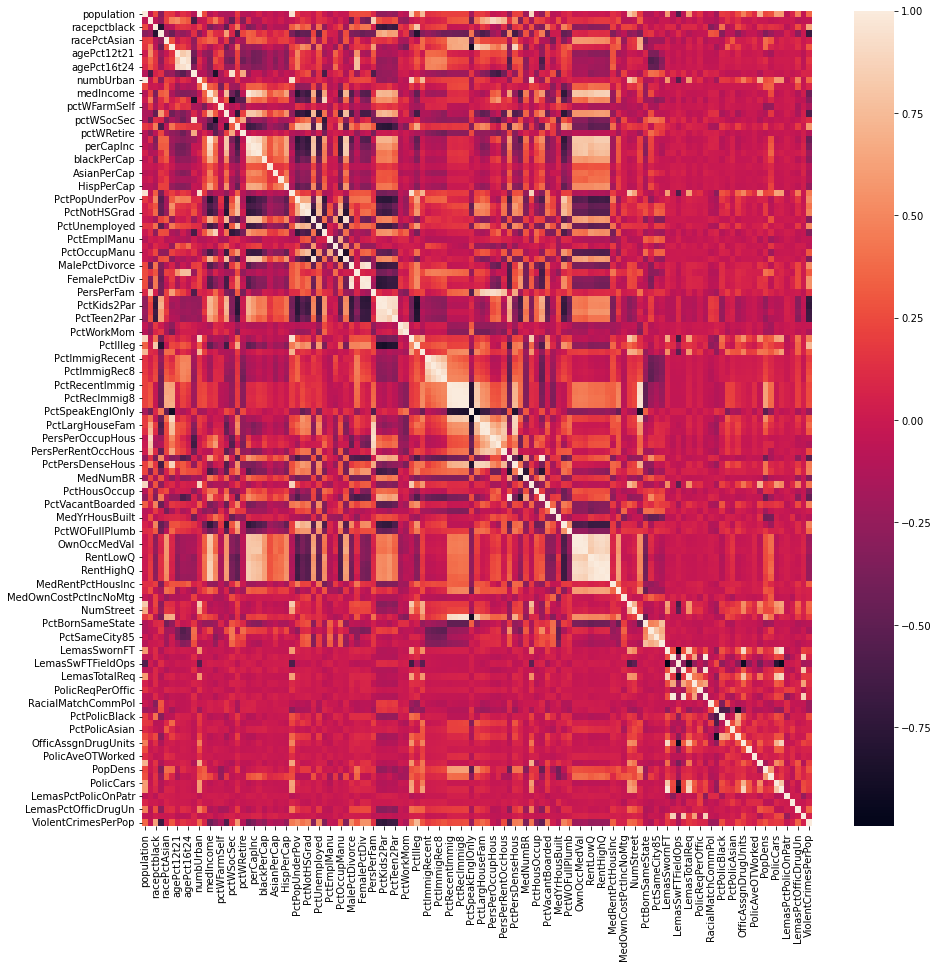

In [579]:
corr = data_t.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr)
plt.show()

2(d)

In [580]:
cv=data_t.std()/data_t.mean()
cv

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.122331
LemasGangUnitDeploy    0.368040
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.337281
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64

2(e)

In [581]:
num = int(np.sqrt(128))
cv_sorted = cv.sort_values(ascending=False)
cv_high = cv_sorted.iloc[:num].index.to_list()

<function matplotlib.pyplot.show(close=None, block=None)>

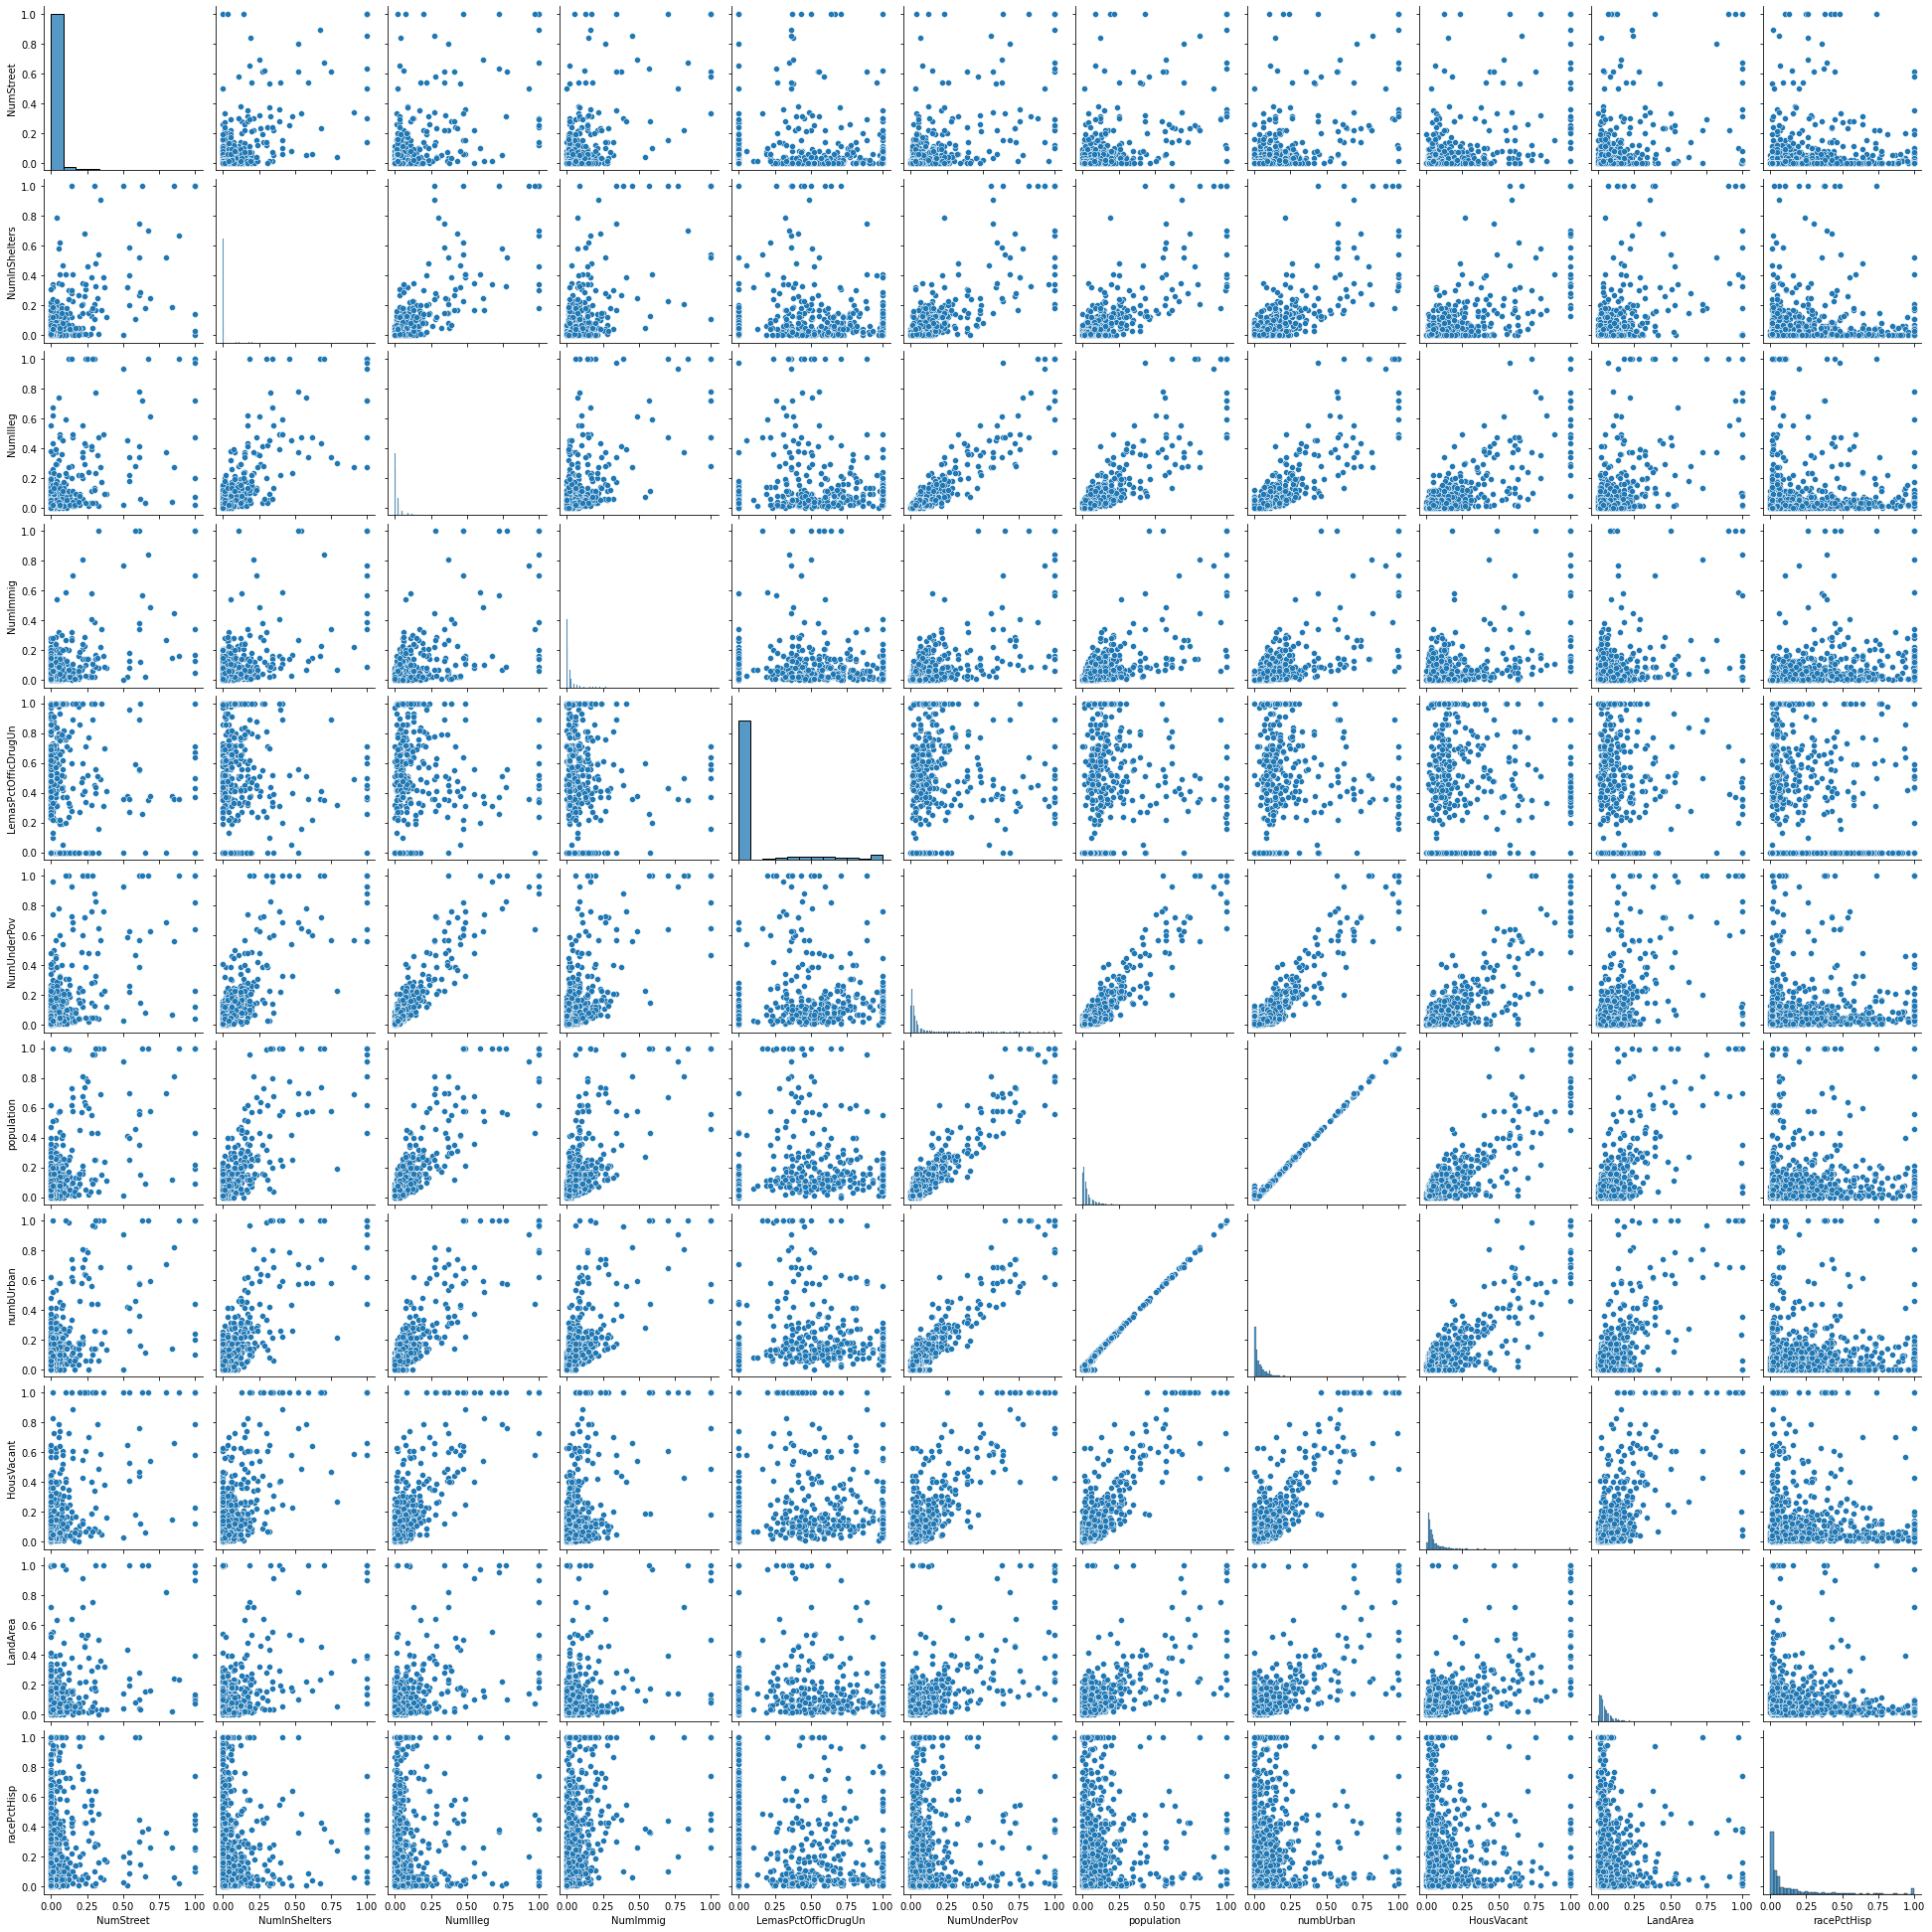

In [582]:
data_high = data_t[cv_high]
plot = sns.pairplot(data_high)
plt.show

<AxesSubplot:>

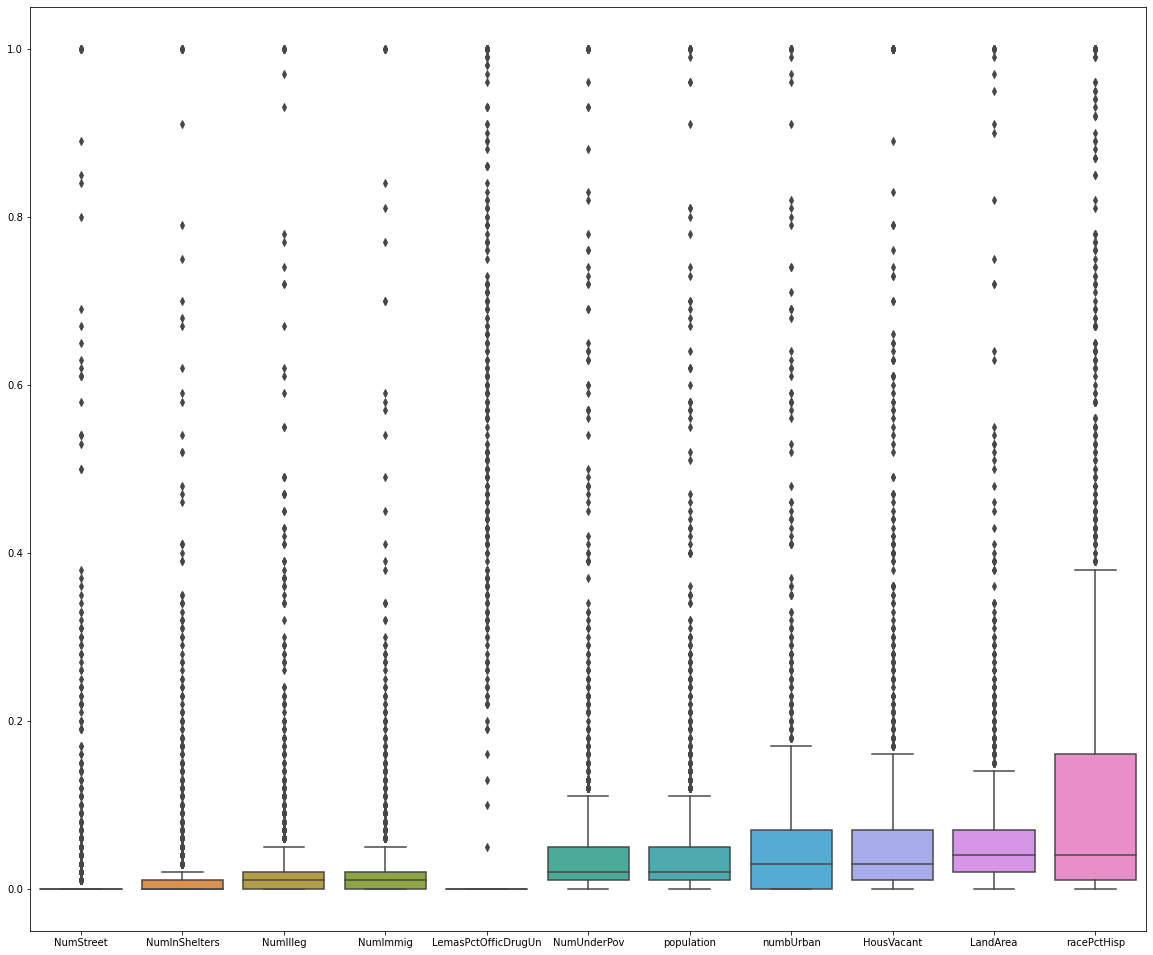

In [583]:
plt.subplots(figsize=(20, 17))
sns.boxplot(data = data_high)

I can't draw any conclusion from the scatter plot above. I observed there may be linear relationship between some features.

2(f)

In [584]:
x_train = train_set.drop('ViolentCrimesPerPop',axis = 1)
y_train = train_set['ViolentCrimesPerPop']
x_test= test_set.drop('ViolentCrimesPerPop',axis = 1)
y_test = test_set['ViolentCrimesPerPop']

In [585]:
lm = LinearRegression()
lm = lm.fit(x_train,y_train)
pred_y = lm.predict(x_test)
print("The test error is ", mean_squared_error(y_test, pred_y))

The test error is  0.7897255274323213


2(g)

In [586]:
from sklearn.linear_model import RidgeCV
alpha = [10 ** n for n in range(-4, 4)]
rcv = RidgeCV(alphas=alpha, cv = 10)
rrmodel = rcv.fit(x_train,y_train)
pred_y = rrmodel.predict(x_test)
print("The test error is ", mean_squared_error(y_test, pred_y))
print("The best lambda is ",rcv.alpha_)

The test error is  0.017737081104303686
The best lambda is  1.0


2(h)

In [587]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas = alpha,cv = 10)
lamodel = lcv.fit(x_train,y_train)
pred_y = lamodel.predict(x_test)
feature_selected=[]
for i in range(len(lamodel.coef_)):
    if lamodel.coef_[i]!=0:
        feature_selected.append(x_train.columns.tolist()[i])
print("The test error is ", mean_squared_error(y_test, pred_y))
print("The best lambda is ",lamodel.alpha_)
print("The selected features are",feature_selected)

The test error is  0.017790185551932517
The best lambda is  0.0001
The selected features are ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',

In [588]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

scaler=StandardScaler()
x_train_stand = scaler.fit_transform(x_train)
x_test_stand = scaler.fit_transform(x_test)
lcv1 = LassoCV(alphas = alpha,cv = 10)
lamodel_stand = lcv1.fit(x_train_stand,y_train)
pred_y = lamodel_stand.predict(x_test_stand)
feature_selected=[]
for i in range(len(lcv.coef_)):
    if lcv.coef_[i]!=0:
        feature_selected.append(x_train.columns.tolist()[i])
print("The test error is ", mean_squared_error(y_test, pred_y))
print("The best lambda is ",lcv.alpha_)
print("The selected features are",feature_selected)


The test error is  0.017955051767110063
The best lambda is  0.0001
The selected features are ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',

Comparing the test error from above,lasso model without standardized features has lower test error.

In [589]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn import model_selection

In [590]:
pca = PCA()
x_t= pca.fit_transform(x_train)
reg = LinearRegression()
mse = []
bestscore = 1
for i in range(1, 123):
    score = -1*model_selection.cross_val_score(reg,
               x_t[:,:i], y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if score < bestscore:
        bestscore = score
        besti = i
    
print('best M is',besti)
print('test error is ',min(mse))


best M is 96
test error is  0.01941328290552715


2(j)

In [591]:
import xgboost as xgb
scores = []
bestscore = 1
besta = 0
for a in alpha:
    xgbmodel = xgb.XGBRegressor(reg_alpha = a)
    #xgbmodel = xgbmodel.fit(x_train,y_train)
    #predict_y = xgbmodel.predict(x_test)
    score = -1*cross_val_score(xgbmodel,x_train, y_train,cv=5,scoring='neg_mean_squared_error').mean()
    scores.append(score)
    if score < bestscore:
        bestscore = score
        besta = a
print("best alpha is",besta)

best alpha is 1
